In [ ]:
# https://www.e-stat.go.jp/stat-search/files?page=1&toukei=00600120&tstat=000001016966  
# 建築物の着工状況について建築主別の建築物の数、床面積の合計、工事費予定額などの結果

In [ ]:
#別表19-1、-2、-3を使って、グラフを作りたい。
#面積のくくりは下記グラフのように12区分で-> 10㎡刻みで12分類 xlsは19-1:~15㎡〜70㎡, 19-2:71〜170㎡,19-1:171〜250㎡ と分割されているので19-1のBP列以降右側をmergeしてから。
#添付したグラフは、①年別、②住宅の種類「合計」(種類は「合計」の「共同」のみ。「小計」「一戸建」「長屋建」は不要)、③利用関係「計」。# 計, 持家, 貸家, 給与住宅, 分譲住宅
#別角度から言うと、①については、月別バージョン、②についてはこれ(年別)だけ、③については他に「貸家」「分譲」のバージョンが必要。->Q: 上記の内, 計,貸家,分譲住宅のみpulldown
#・年と月で作成 -> 2022年以降最新年のみ
#・住宅の種類の行は「合計」の"共同"のみでOK（専用住宅、併用住宅、その他は不要）
#・利用関係の列は、計、貸家、分譲の値がほしいのでプルダウン等で選択抽出できるとうれしい。

#・前回同様、県・市ごとの抽出。グラフは「練馬区」のもの。
#グラフだけでなく、エクセルの表抽出がほしい。

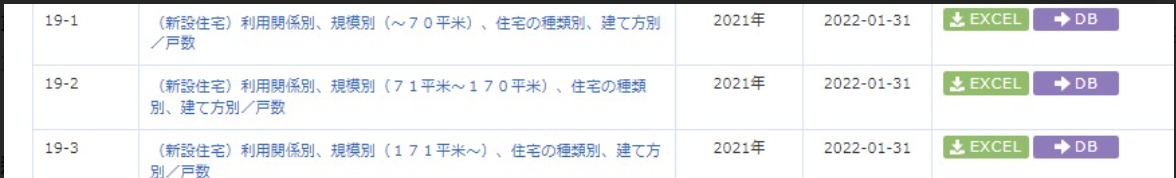

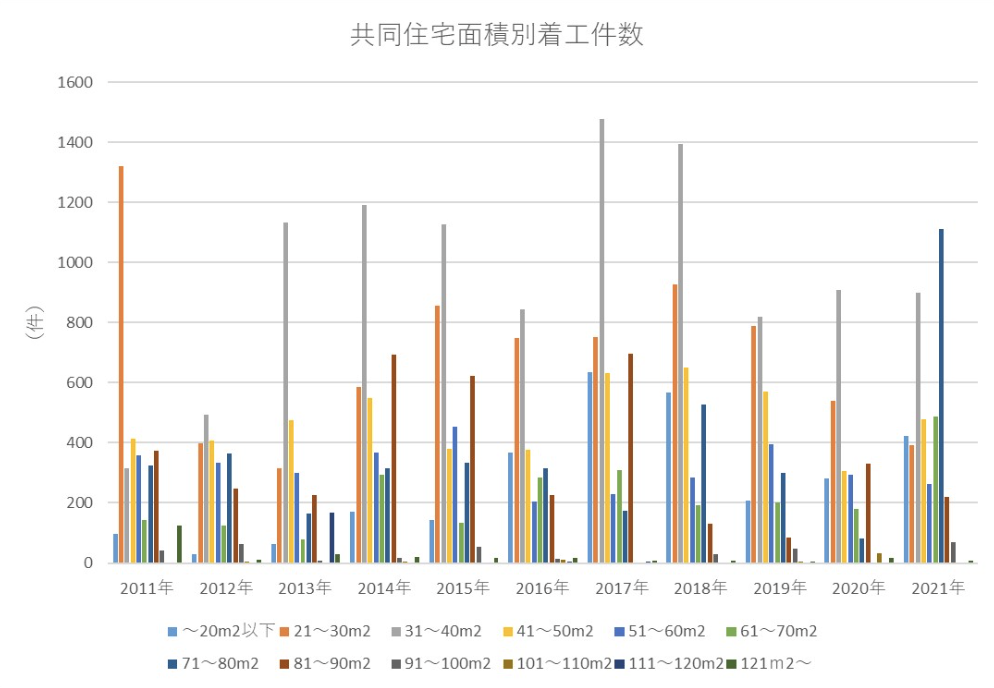

In [ ]:
#urllibで下記の年のみを入れ替えてscrapingでも。for for year in range(2012,this_year+1):
#https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00600120&tstat=000001016966&cycle=7&year=20110&month=0&result_back=1&tclass1val=0

In [ ]:
#下記パスから19-1〜19-3の順に.xlsをDL
#/html/body/div[1]/div/main/div[2]/section/div[2]/div/div/div[1]/section/section/div/div[3]/div/article[12]/div/ul/li[2]/div/div[4]/div/a

In [2]:
from glob import glob
monthly_or_yearly_files = glob('*.xls')  # []になる。#files = list(glob.glob("/ここにpath/*.xls"))の方がわかりやすい。
monthly_or_yearly_files.sort()  # reverse=Trueで降順
monthly_or_yearly_files  # これをforで回す

['2012年19-1.xls',
 '2012年19-2.xls',
 '2012年19-3.xls',
 '2013年19-1.xls',
 '2013年19-2.xls',
 '2013年19-3.xls']

In [3]:
# xls連結はここから(dfのみ.pxは不要)
import pandas as pd

!pip install --upgrade xlrd
import xlrd
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# やりたいこと:　各年の①19-1〜19-3の各sheetを縦につなぐ(concat:冒頭7rows削除)してから、19-2, 19-3(㎡区分)を横にmerge。これをforで
# csvにしてからでも、〜15㎡から～20㎡以下までを1つにまとめる。

In [4]:
# 〜15㎡から～20㎡以下の4列の和, 121～130㎡から251㎡以上の10列の和
# 161列
old_columns_1 = {'県市区(町村)': object, 
       '総計_合計_小計(戸)': int, '総計_合計_一戸建(戸)': int, '総計_合計_長屋(戸)': int, '総計_合計_共同(戸)': int,
       '総計_専用住宅_小計(戸)': int, '総計_専用住宅_一戸建(戸)': int, '総計_専用住宅_長屋(戸)': int, '総計_専用住宅_共同(戸)': int,
       '総計_併用住宅_小計(戸)': int, '総計_併用住宅_一戸建(戸)': int, '総計_併用住宅_長屋(戸)': int, '総計_併用住宅_共同(戸)': int,
       '総計_その他の住宅_小計(戸)': int, '総計_その他の住宅_一戸建(戸)': int, '総計_その他の住宅_長屋(戸)': int, '総計_その他の住宅_共同(戸)': int,
       '〜15㎡_合計_小計(戸)': int, '〜15㎡_合計_一戸建(戸)': int, '〜15㎡_合計_長屋(戸)': int, '〜15㎡_合計_共同(戸)': int,
       '〜15㎡_専用住宅_小計(戸)': int, '〜15㎡_専用住宅_一戸建(戸)': int, '〜15㎡_専用住宅_長屋(戸)': int, '〜15㎡_専用住宅_共同(戸)': int,
       '〜15㎡_併用住宅_小計(戸)': int, '〜15㎡_併用住宅_一戸建(戸)': int, '〜15㎡_併用住宅_長屋(戸)': int, '〜15㎡_併用住宅_共同(戸)': int,
       '〜15㎡_その他の住宅_小計(戸)': int, '〜15㎡_その他の住宅_一戸建(戸)': int, '〜15㎡_その他の住宅_長屋(戸)': int, '〜15㎡_その他の住宅_共同(戸)': int,
       '16～18㎡_合計_小計(戸)': int, '16～18㎡_合計_一戸建(戸)': int, '16～18㎡_合計_長屋(戸)': int, '16～18㎡_合計_共同(戸)': int,
       '16～18㎡_専用住宅_小計(戸)': int, '16～18㎡_専用住宅_一戸建(戸)': int, '16～18㎡_専用住宅_長屋(戸)': int, '16～18㎡_専用住宅_共同(戸)': int,
       '16～18㎡_併用住宅_小計(戸)': int, '16～18㎡_併用住宅_一戸建(戸)': int, '16～18㎡_併用住宅_長屋(戸)': int, '16～18㎡_併用住宅_共同(戸)': int,
       '16～18㎡_その他の住宅_小計(戸)': int, '16～18㎡_その他の住宅_一戸建(戸)': int, '16～18㎡_その他の住宅_長屋(戸)': int, '16～18㎡_その他の住宅_共同(戸)': int,
       '19～20㎡_合計_小計(戸)': int, '19～20㎡_合計_一戸建(戸)': int, '19～20㎡_合計_長屋(戸)': int, '19～20㎡_合計_共同(戸)': int,
       '19～20㎡_専用住宅_小計(戸)': int, '19～20㎡_専用住宅_一戸建(戸)': int, '19～20㎡_専用住宅_長屋(戸)': int, '19～20㎡_専用住宅_共同(戸)': int,
       '19～20㎡_併用住宅_小計(戸)': int, '19～20㎡_併用住宅_一戸建(戸)': int, '19～20㎡_併用住宅_長屋(戸)': int, '19～20㎡_併用住宅_共同(戸)': int,
       '19～20㎡_その他の住宅_小計(戸)': int, '19～20㎡_その他の住宅_一戸建(戸)': int, '19～20㎡_その他の住宅_長屋(戸)': int, '19～20㎡_その他の住宅_共同(戸)': int,
       '～20㎡以下_合計_小計(戸)': int, '～20㎡以下_合計_一戸建(戸)': int, '～20㎡以下_合計_長屋(戸)': int, '～20㎡以下_合計_共同(戸)': int,
       '～20㎡以下_専用住宅_小計(戸)': int, '～20㎡以下_専用住宅_一戸建(戸)': int, '～20㎡以下_専用住宅_長屋(戸)': int, '～20㎡以下_専用住宅_共同(戸)': int,
       '～20㎡以下_併用住宅_小計(戸)': int, '～20㎡以下_併用住宅_一戸建(戸)': int, '～20㎡以下_併用住宅_長屋(戸)': int, '～20㎡以下_併用住宅_共同(戸)': int,
       '～20㎡以下_その他の住宅_小計(戸)': int, '～20㎡以下_その他の住宅_一戸建(戸)': int, '～20㎡以下_その他の住宅_長屋(戸)': int, '～20㎡以下_その他の住宅_共同(戸)': int,
       '21～30㎡_合計_小計(戸)': int, '21～30㎡_合計_一戸建(戸)': int, '21～30㎡_合計_長屋(戸)': int, '21～30㎡_合計_共同(戸)': int,
       '21～30㎡_専用住宅_小計(戸)': int, '21～30㎡_専用住宅_一戸建(戸)': int, '21～30㎡_専用住宅_長屋(戸)': int, '21～30㎡_専用住宅_共同(戸)': int,
       '21～30㎡_併用住宅_小計(戸)': int, '21～30㎡_併用住宅_一戸建(戸)': int, '21～30㎡_併用住宅_長屋(戸)': int, '21～30㎡_併用住宅_共同(戸)': int,
       '21～30㎡_その他の住宅_小計(戸)': int, '21～30㎡_その他の住宅_一戸建(戸)': int, '21～30㎡_その他の住宅_長屋(戸)': int, '21～30㎡_その他の住宅_共同(戸)': int,
       '31～40㎡_合計_小計(戸)': int, '31～40㎡_合計_一戸建(戸)': int, '31～40㎡_合計_長屋(戸)': int, '31～40㎡_合計_共同(戸)': int,
       '31～40㎡_専用住宅_小計(戸)': int, '31～40㎡_専用住宅_一戸建(戸)': int, '31～40㎡_専用住宅_長屋(戸)': int, '31～40㎡_専用住宅_共同(戸)': int,
       '31～40㎡_併用住宅_小計(戸)': int, '31～40㎡_併用住宅_一戸建(戸)': int, '31～40㎡_併用住宅_長屋(戸)': int, '31～40㎡_併用住宅_共同(戸)': int,
       '31～40㎡_その他の住宅_小計(戸)': int, '31～40㎡_その他の住宅_一戸建(戸)': int, '31～40㎡_その他の住宅_長屋(戸)': int, '31～40㎡_その他の住宅_共同(戸)': int,
       '41～50㎡_合計_小計(戸)': int, '41～50㎡_合計_一戸建(戸)': int, '41～50㎡_合計_長屋(戸)': int, '41～50㎡_合計_共同(戸)': int,
       '41～50㎡_専用住宅_小計(戸)': int, '41～50㎡_専用住宅_一戸建(戸)': int, '41～50㎡_専用住宅_長屋(戸)': int, '41～50㎡_専用住宅_共同(戸)': int,
       '41～50㎡_併用住宅_小計(戸)': int, '41～50㎡_併用住宅_一戸建(戸)': int, '41～50㎡_併用住宅_長屋(戸)': int, '41～50㎡_併用住宅_共同(戸)': int,
       '41～50㎡_その他の住宅_小計(戸)': int, '41～50㎡_その他の住宅_一戸建(戸)': int, '41～50㎡_その他の住宅_長屋(戸)': int, '41～50㎡_その他の住宅_共同(戸)': int,
       '51～60㎡_合計_小計(戸)': int, '51～60㎡_合計_一戸建(戸)': int, '51～60㎡_合計_長屋(戸)': int, '51～60㎡_合計_共同(戸)': int,
       '51～60㎡_専用住宅_小計(戸)': int, '51～60㎡_専用住宅_一戸建(戸)': int, '51～60㎡_専用住宅_長屋(戸)': int, '51～60㎡_専用住宅_共同(戸)': int,
       '51～60㎡_併用住宅_小計(戸)': int, '51～60㎡_併用住宅_一戸建(戸)': int, '51～60㎡_併用住宅_長屋(戸)': int, '51～60㎡_併用住宅_共同(戸)': int,
       '51～60㎡_その他の住宅_小計(戸)': int, '51～60㎡_その他の住宅_一戸建(戸)': int, '51～60㎡_その他の住宅_長屋(戸)': int, '51～60㎡_その他の住宅_共同(戸)': int,
       '61～70㎡_合計_小計(戸)': int, '61～70㎡_合計_一戸建(戸)': int, '61～70㎡_合計_長屋(戸)': int, '61～70㎡_合計_共同(戸)': int,
       '61～70㎡_専用住宅_小計(戸)': int, '61～70㎡_専用住宅_一戸建(戸)': int, '61～70㎡_専用住宅_長屋(戸)': int, '61～70㎡_専用住宅_共同(戸)': int,
       '61～70㎡_併用住宅_小計(戸)': int, '61～70㎡_併用住宅_一戸建(戸)': int, '61～70㎡_併用住宅_長屋(戸)': int, '61～70㎡_併用住宅_共同(戸)': int,
       '61～70㎡_その他の住宅_小計(戸)': int, '61～70㎡_その他の住宅_一戸建(戸)': int, '61～70㎡_その他の住宅_長屋(戸)': int, '61～70㎡_その他の住宅_共同(戸)': int
        }

# 161列
old_columns_2 = {'県市区(町村)': object,
       '71～80㎡_合計_小計(戸)': int, '71～80㎡_合計_一戸建(戸)': int, '71～80㎡_合計_長屋(戸)': int, '71～80㎡_合計_共同(戸)': int,
       '71～80㎡_専用住宅_小計(戸)': int, '71～80㎡_専用住宅_一戸建(戸)': int, '71～80㎡_専用住宅_長屋(戸)': int, '71～80㎡_専用住宅_共同(戸)': int,
       '71～80㎡_併用住宅_小計(戸)': int, '71～80㎡_併用住宅_一戸建(戸)': int, '71～80㎡_併用住宅_長屋(戸)': int, '71～80㎡_併用住宅_共同(戸)': int,
       '71～80㎡_その他の住宅_小計(戸)': int, '71～80㎡_その他の住宅_一戸建(戸)': int, '71～80㎡_その他の住宅_長屋(戸)': int, '71～80㎡_その他の住宅_共同(戸)': int,
       '81～90㎡_合計_小計(戸)': int, '81～90㎡_合計_一戸建(戸)': int, '81～90㎡_合計_長屋(戸)': int, '81～90㎡_合計_共同(戸)': int,
       '81～90㎡_専用住宅_小計(戸)': int, '81～90㎡_専用住宅_一戸建(戸)': int, '81～90㎡_専用住宅_長屋(戸)': int, '81～90㎡_専用住宅_共同(戸)': int,
       '81～90㎡_併用住宅_小計(戸)': int, '81～90㎡_併用住宅_一戸建(戸)': int, '81～90㎡_併用住宅_長屋(戸)': int, '81～90㎡_併用住宅_共同(戸)': int,
       '81～90㎡_その他の住宅_小計(戸)': int, '81～90㎡_その他の住宅_一戸建(戸)': int, '81～90㎡_その他の住宅_長屋(戸)': int, '81～90㎡_その他の住宅_共同(戸)': int,
       '91～100㎡_合計_小計(戸)': int, '91～100㎡_合計_一戸建(戸)': int, '91～100㎡_合計_長屋(戸)': int, '91～100㎡_合計_共同(戸)': int,
       '91～100㎡_専用住宅_小計(戸)': int, '91～100㎡_専用住宅_一戸建(戸)': int, '91～100㎡_専用住宅_長屋(戸)': int, '91～100㎡_専用住宅_共同(戸)': int,
       '91～100㎡_併用住宅_小計(戸)': int, '91～100㎡_併用住宅_一戸建(戸)': int, '91～100㎡_併用住宅_長屋(戸)': int, '91～100㎡_併用住宅_共同(戸)': int,
       '91～100㎡_その他の住宅_小計(戸)': int, '91～100㎡_その他の住宅_一戸建(戸)': int, '91～100㎡_その他の住宅_長屋(戸)': int, '91～100㎡_その他の住宅_共同(戸)': int,
       '101～110㎡_合計_小計(戸)': int, '101～110㎡_合計_一戸建(戸)': int, '101～110㎡_合計_長屋(戸)': int, '101～110㎡_合計_共同(戸)': int,
       '101～110㎡_専用住宅_小計(戸)': int, '101～110㎡_専用住宅_一戸建(戸)': int, '101～110㎡_専用住宅_長屋(戸)': int, '101～110㎡_専用住宅_共同(戸)': int,
       '101～110㎡_併用住宅_小計(戸)': int, '101～110㎡_併用住宅_一戸建(戸)': int, '101～110㎡_併用住宅_長屋(戸)': int, '101～110㎡_併用住宅_共同(戸)': int,
       '101～110㎡_その他の住宅_小計(戸)': int, '101～110㎡_その他の住宅_一戸建(戸)': int, '101～110㎡_その他の住宅_長屋(戸)': int, '101～110㎡_その他の住宅_共同(戸)': int,
       '111～120㎡_合計_小計(戸)': int, '111～120㎡_合計_一戸建(戸)': int, '111～120㎡_合計_長屋(戸)': int, '111～120㎡_合計_共同(戸)': int,
       '111～120㎡_専用住宅_小計(戸)': int, '111～120㎡_専用住宅_一戸建(戸)': int, '111～120㎡_専用住宅_長屋(戸)': int, '111～120㎡_専用住宅_共同(戸)': int,
       '111～120㎡_併用住宅_小計(戸)': int, '111～120㎡_併用住宅_一戸建(戸)': int, '111～120㎡_併用住宅_長屋(戸)': int, '111～120㎡_併用住宅_共同(戸)': int,
       '111～120㎡_その他の住宅_小計(戸)': int, '111～120㎡_その他の住宅_一戸建(戸)': int, '111～120㎡_その他の住宅_長屋(戸)': int, '111～120㎡_その他の住宅_共同(戸)': int,  
       '121～130㎡_合計_小計(戸)': int, '121～130㎡_合計_一戸建(戸)': int, '121～130㎡_合計_長屋(戸)': int, '121～130㎡_合計_共同(戸)': int,
       '121～130㎡_専用住宅_小計(戸)': int, '121～130㎡_専用住宅_一戸建(戸)': int, '121～130㎡_専用住宅_長屋(戸)': int, '121～130㎡_専用住宅_共同(戸)': int,
       '121～130㎡_併用住宅_小計(戸)': int, '121～130㎡_併用住宅_一戸建(戸)': int, '121～130㎡_併用住宅_長屋(戸)': int, '121～130㎡_併用住宅_共同(戸)': int,
       '121～130㎡_その他の住宅_小計(戸)': int, '121～130㎡_その他の住宅_一戸建(戸)': int, '121～130㎡_その他の住宅_長屋(戸)': int, '121～130㎡_その他の住宅_共同(戸)': int, 
       '131～140㎡_合計_小計(戸)': int, '131～140㎡_合計_一戸建(戸)': int, '131～140㎡_合計_長屋(戸)': int, '131～140㎡_合計_共同(戸)': int,
       '131～140㎡_専用住宅_小計(戸)': int, '131～140㎡_専用住宅_一戸建(戸)': int, '131～140㎡_専用住宅_長屋(戸)': int, '131～140㎡_専用住宅_共同(戸)': int,
       '131～140㎡_併用住宅_小計(戸)': int, '131～140㎡_併用住宅_一戸建(戸)': int, '131～140㎡_併用住宅_長屋(戸)': int, '131～140㎡_併用住宅_共同(戸)': int,
       '131～140㎡_その他の住宅_小計(戸)': int, '131～140㎡_その他の住宅_一戸建(戸)': int, '131～140㎡_その他の住宅_長屋(戸)': int, '131～140㎡_その他の住宅_共同(戸)': int,
       '141～150㎡_合計_小計(戸)': int, '141～150㎡_合計_一戸建(戸)': int, '141～150㎡_合計_長屋(戸)': int, '141～150㎡_合計_共同(戸)': int,
       '141～150㎡_専用住宅_小計(戸)': int, '141～150㎡_専用住宅_一戸建(戸)': int, '141～150㎡_専用住宅_長屋(戸)': int, '141～150㎡_専用住宅_共同(戸)': int,
       '141～150㎡_併用住宅_小計(戸)': int, '141～150㎡_併用住宅_一戸建(戸)': int, '141～150㎡_併用住宅_長屋(戸)': int, '141～150㎡_併用住宅_共同(戸)': int,
       '141～150㎡_その他の住宅_小計(戸)': int, '141～150㎡_その他の住宅_一戸建(戸)': int, '141～150㎡_その他の住宅_長屋(戸)': int, '141～150㎡_その他の住宅_共同(戸)': int,
       '151～160㎡_合計_小計(戸)': int, '151～160㎡_合計_一戸建(戸)': int, '151～160㎡_合計_長屋(戸)': int, '151～160㎡_合計_共同(戸)': int,
       '151～160㎡_専用住宅_小計(戸)': int, '151～160㎡_専用住宅_一戸建(戸)': int, '151～160㎡_専用住宅_長屋(戸)': int, '151～160㎡_専用住宅_共同(戸)': int,
       '151～160㎡_併用住宅_小計(戸)': int, '151～160㎡_併用住宅_一戸建(戸)': int, '151～160㎡_併用住宅_長屋(戸)': int, '151～160㎡_併用住宅_共同(戸)': int,
       '151～160㎡_その他の住宅_小計(戸)': int, '151～160㎡_その他の住宅_一戸建(戸)': int, '151～160㎡_その他の住宅_長屋(戸)': int, '151～160㎡_その他の住宅_共同(戸)': int,
       '161～170㎡_合計_小計(戸)': int, '161～170㎡_合計_一戸建(戸)': int, '161～170㎡_合計_長屋(戸)': int, '161～170㎡_合計_共同(戸)': int,
       '161～170㎡_専用住宅_小計(戸)': int, '161～170㎡_専用住宅_一戸建(戸)': int, '161～170㎡_専用住宅_長屋(戸)': int, '161～170㎡_専用住宅_共同(戸)': int,
       '161～170㎡_併用住宅_小計(戸)': int, '161～170㎡_併用住宅_一戸建(戸)': int, '161～170㎡_併用住宅_長屋(戸)': int, '161～170㎡_併用住宅_共同(戸)': int,
       '161～170㎡_その他の住宅_小計(戸)': int, '161～170㎡_その他の住宅_一戸建(戸)': int, '161～170㎡_その他の住宅_長屋(戸)': int, '161～170㎡_その他の住宅_共同(戸)': int
        }
# 81列
old_columns_3 = {'県市区(町村)': object,
       '171～180㎡_合計_小計(戸)': int, '171～180㎡_合計_一戸建(戸)': int, '171～180㎡_合計_長屋(戸)': int, '171～180㎡_合計_共同(戸)': int,
       '171～180㎡_専用住宅_小計(戸)': int, '171～180㎡_専用住宅_一戸建(戸)': int, '171～180㎡_専用住宅_長屋(戸)': int, '171～180㎡_専用住宅_共同(戸)': int,
       '171～180㎡_併用住宅_小計(戸)': int, '171～180㎡_併用住宅_一戸建(戸)': int, '171～180㎡_併用住宅_長屋(戸)': int, '171～180㎡_併用住宅_共同(戸)': int,
       '171～180㎡_その他の住宅_小計(戸)': int, '171～180㎡_その他の住宅_一戸建(戸)': int, '171～180㎡_その他の住宅_長屋(戸)': int, '171～180㎡_その他の住宅_共同(戸)': int,
       '181～200㎡_合計_小計(戸)': int, '181～200㎡_合計_一戸建(戸)': int, '181～200㎡_合計_長屋(戸)': int, '181～200㎡_合計_共同(戸)': int,
       '181～200㎡_専用住宅_小計(戸)': int, '181～200㎡_専用住宅_一戸建(戸)': int, '181～200㎡_専用住宅_長屋(戸)': int, '181～200㎡_専用住宅_共同(戸)': int,
       '181～200㎡_併用住宅_小計(戸)': int, '181～200㎡_併用住宅_一戸建(戸)': int, '181～200㎡_併用住宅_長屋(戸)': int, '181～200㎡_併用住宅_共同(戸)': int,
       '181～200㎡_その他の住宅_小計(戸)': int, '181～200㎡_その他の住宅_一戸建(戸)': int, '181～200㎡_その他の住宅_長屋(戸)': int, '181～200㎡_その他の住宅_共同(戸)': int,
       '201～230㎡_合計_小計(戸)': int, '201～230㎡_合計_一戸建(戸)': int, '201～230㎡_合計_長屋(戸)': int, '201～230㎡_合計_共同(戸)': int,
       '201～230㎡_専用住宅_小計(戸)': int, '201～230㎡_専用住宅_一戸建(戸)': int, '201～230㎡_専用住宅_長屋(戸)': int, '201～230㎡_専用住宅_共同(戸)': int,
       '201～230㎡_併用住宅_小計(戸)': int, '201～230㎡_併用住宅_一戸建(戸)': int, '201～230㎡_併用住宅_長屋(戸)': int, '201～230㎡_併用住宅_共同(戸)': int,
       '201～230㎡_その他の住宅_小計(戸)': int, '201～230㎡_その他の住宅_一戸建(戸)': int, '201～230㎡_その他の住宅_長屋(戸)': int, '201～230㎡_その他の住宅_共同(戸)': int,
       '231～250㎡_合計_小計(戸)': int, '231～250㎡_合計_一戸建(戸)': int, '231～250㎡_合計_長屋(戸)': int, '231～250㎡_合計_共同(戸)': int,
       '231～250㎡_専用住宅_小計(戸)': int, '231～250㎡_専用住宅_一戸建(戸)': int, '231～250㎡_専用住宅_長屋(戸)': int, '231～250㎡_専用住宅_共同(戸)': int,
       '231～250㎡_併用住宅_小計(戸)': int, '231～250㎡_併用住宅_一戸建(戸)': int, '231～250㎡_併用住宅_長屋(戸)': int, '231～250㎡_併用住宅_共同(戸)': int,
       '231～250㎡_その他の住宅_小計(戸)': int, '231～250㎡_その他の住宅_一戸建(戸)': int, '231～250㎡_その他の住宅_長屋(戸)': int, '231～250㎡_その他の住宅_共同(戸)': int,
       '251㎡以上_合計_小計(戸)': int, '251㎡以上_合計_一戸建(戸)': int, '251㎡以上_合計_長屋(戸)': int, '251㎡以上_合計_共同(戸)': int,
       '251㎡以上_専用住宅_小計(戸)': int, '251㎡以上_専用住宅_一戸建(戸)': int, '251㎡以上_専用住宅_長屋(戸)': int, '251㎡以上_専用住宅_共同(戸)': int,
       '251㎡以上_併用住宅_小計(戸)': int, '251㎡以上_併用住宅_一戸建(戸)': int, '251㎡以上_併用住宅_長屋(戸)': int, '251㎡以上_併用住宅_共同(戸)': int,
       '251㎡以上_その他の住宅_小計(戸)': int, '251㎡以上_その他の住宅_一戸建(戸)': int, '251㎡以上_その他の住宅_長屋(戸)': int, '251㎡以上_その他の住宅_共同(戸)': int,   
       }

# new_columns = {'県市区(町村)': object, 
#        '～20㎡以下_合計_共同(戸)': int,
#        '21～30㎡_合計_共同(戸)': int,
#        '31～40㎡_合計_共同(戸)': int,
#        '41～50㎡_合計_共同(戸)': int,
#        '51～60㎡_合計_共同(戸)': int,
#        '61～70㎡_合計_共同(戸)': int,
#        '71～80㎡_合計_共同(戸)': int,
#        '81～90㎡_合計_共同(戸)': int,
#        '91～100㎡_合計_共同(戸)': int,
#        '101～110㎡_合計_共同(戸)': int,
#        '111～120㎡_合計_共同(戸)': int, 
#        '121㎡以上_合計_共同(戸)': int,
#        }

In [5]:
# 19-1
year = 2012
# dfs = ["df" + str(i) for i in range(1, 4)]  # df1〜df12まで先に作成 ここですべてのdfを空のdfにしておく# create an Empty DataFrame object
# print(dfs) # df1, ..., df3

#for i in range(len(dfs)):
filename = f"{year}年19-1.xls"
df1 = pd.concat(pd.read_excel(filename, sheet_name=None, skiprows=6))  #これで一発
df1
#df1.to_excel("df2012_sheet_merge_19-1.xlsx")
# df_all = dfs[0]  # 初期値は、空のdfではなくdf1を代入しておく。
# for i in range(2):
#   df_all = df_all.merge(dfs[i + 1], how="outer", on="利用関係")  # ここがYearlyでもmonthlyでも"市区町村"。mergeですべてできるためjoinは使わない. onはたとえ1つしか共通カラムがない場合でも指定する(可読性). 左(大)に右をくっつける:過不足がないことがわかっていればinnerを，追加の表がベースの表より足りないケースは’left’を//左外部結合
#   #return df_all　　# FL列まで168列, 1200×5 + 792行(=6792行)と整合

Unnamed: 0  利用関係  Unnamed: 2  小計　　 （戸）  一戸建　　（戸）  長屋建　　（戸）  \
B01901     0           NaN   全国計         NaN       NaN       NaN       NaN   
           1           NaN     計         NaN  882797.0  439588.0   97055.0   
           2           NaN    持家         NaN  311589.0  308302.0    1938.0   
           3           NaN    貸家         NaN  318521.0    7668.0   94076.0   
           4           NaN  給与住宅         NaN    5877.0    1028.0     345.0   
...                    ...   ...         ...       ...       ...       ...   
B01901 (6) 787         NaN     計         NaN     497.0     178.0      32.0   
           788         NaN    持家         NaN     200.0     172.0      20.0   
           789         NaN    貸家         NaN     291.0       0.0      12.0   
           790         NaN  給与住宅         NaN       0.0       0.0       0.0   
           791         NaN  分譲住宅         NaN       6.0       6.0       0.0   

                共同　　 （戸）  小計　　 （戸）.1  一戸建　　（戸）.1  長屋建　　（戸）.1  ...  \
B01901     0         NaN         NaN         NaN         NaN  ...   
           1    346154.0    856138.0    434563.0     96581.0  ...   
           2      1349.0    307086.0    304073.0      1877.0  ...   
           3    216777.0    302214.0      7409.0     93714.0  ...   
           4      4504.0      4776.0       669.0       302.0  ...   
...                  ...         ...         ...         ...  ...   
B01901 (6) 787     287.0       479.0       169.0        32.0  ...   
           788       8.0       191.0       163.0        20.0  ...   
           789     279.0       282.0         0.0        12.0  ...   
           790       0.0         0.0         0.0         0.0  ...   
           791       0.0         6.0         6.0         0.0  ...   

                長屋建　　（戸）.37  共同　　 （戸）.37  小計　　 （戸）.38  一戸建　　（戸）.38  \
B01901     0            NaN          NaN          NaN          NaN   
           1        14225.0      32984.0       1942.0        276.0   
           2          216.0         82.0        238.0        214.0   
           3        13883.0      28608.0       1538.0         23.0   
           4           29.0        430.0         25.0         23.0   
...                     ...          ...          ...          ...   
B01901 (6) 787          2.0         93.0          1.0          1.0   
           788          2.0          3.0          1.0          1.0   
           789          0.0         90.0          0.0          0.0   
           790          0.0          0.0          0.0          0.0   
           791          0.0          0.0          0.0          0.0   

                長屋建　　（戸）.38  共同　　 （戸）.38  小計　　 （戸）.39  一戸建　　（戸）.39  \
B01901     0            NaN          NaN          NaN          NaN   
           1           42.0       1624.0          3.0          3.0   
           2            4.0         20.0          1.0          1.0   
           3           38.0       1477.0          1.0          1.0   
           4            0.0          2.0          0.0          0.0   
...                     ...          ...          ...          ...   
B01901 (6) 787          0.0          0.0          0.0          0.0   
           788          0.0          0.0          0.0          0.0   
           789          0.0          0.0          0.0          0.0   
           790          0.0          0.0          0.0          0.0   
           791          0.0          0.0          0.0          0.0   

                長屋建　　（戸）.39  共同　　 （戸）.39  
B01901     0            NaN          NaN  
           1            0.0          0.0  
           2            0.0          0.0  
           3            0.0          0.0  
           4            0.0          0.0  
...                     ...          ...  
B01901 (6) 787          0.0          0.0  
           788          0.0          0.0  
           789          0.0          0.0  
           790          0.0          0.0  
           791          0.0          0.0  

[6792 rows x 163 columns]

In [6]:
from pandas.core.apply import Axis
## RAM不足のエラーのため、やむなく先に不要列を削除。
df1_modified = df1.drop(df1.columns[[0, 2]], axis=1)  # 列方向に削除 []形式で渡す # 0と2列目を削除の意
#df1_modified 161列
df1_modified.columns = old_columns_1  #old_columns_1(161列)を適用
# indexは4行skip毎の値を抽出 -> list内包で
index_col = list(df1_modified.iloc[:,0])  # listで一発. 
index_list = []
for idx, bunrui in enumerate(index_col):
  if idx % 6 == 0:
    index_list.append(index_col[idx])
  elif idx % 6 == 1:
    index_list.append(index_col[idx-1] + "_計")
  elif idx % 6 == 2:
    index_list.append(index_col[idx-2] + "_持家")
  elif idx % 6 == 3:
    index_list.append(index_col[idx-3] + "_貸家")
  elif idx % 6 == 4:
    index_list.append(index_col[idx-4] + "_給与住宅")
  elif idx % 6 == 5:
    index_list.append(index_col[idx-5] + "_分譲住宅")  
print(index_list)  # 市部計, 郡部計 1132行(県市) = 6792 / 6 で整合
print(len(index_list))  # あとはこれをindexに追加するだけ(冒頭列の前に追加すればよさそう. その後冒頭列を削除)。計, 持家, 貸家, 給与住宅, 分譲住宅
df1_modified.index = index_list
#df1_final = df1_modified.drop(df1.columns[[0]], axis=1)
# 〜20㎡はやはりそれまでの列の合計なので以前の列は不要
df1_modified.iloc[:,65:]  #　列は(〜20㎡以降の)"合計"の"共同"だけでよい
#df1 [f'新設戸建延床面積の平均面積_{year}'] = dfs[year - 2012]['新設_一戸建_床面積の合計 （㎡）'].div(dfs[year - 2012]['新設_一戸建_戸数・件数（戸・件）'], axis=0)  # N/O列(AS ALIASのように別名に)分を1列追加　この場合欠損値があると結果もNaNになるゆえ最初に確認 df["列名"].isna().sum()
# さらに共同だけを抽出。
df1_filtered = df1_modified.filter(like="合計_共同(戸)", axis=1)  # 列の正規表現
df1_filtered.iloc[:,4:]  # 目当てのdataが抽出できた。同様にdf2, df3も行い、最後にLEFT JOINで

['全国計', '全国計_計', '全国計_持家', '全国計_貸家', '全国計_給与住宅', '全国計_分譲住宅', '01000北海道', '01000北海道_計', '01000北海道_持家', '01000北海道_貸家', '01000北海道_給与住宅', '01000北海道_分譲住宅', '02000青森', '02000青森_計', '02000青森_持家', '02000青森_貸家', '02000青森_給与住宅', '02000青森_分譲住宅', '03000岩手', '03000岩手_計', '03000岩手_持家', '03000岩手_貸家', '03000岩手_給与住宅', '03000岩手_分譲住宅', '04000宮城', '04000宮城_計', '04000宮城_持家', '04000宮城_貸家', '04000宮城_給与住宅', '04000宮城_分譲住宅', '05000秋田', '05000秋田_計', '05000秋田_持家', '05000秋田_貸家', '05000秋田_給与住宅', '05000秋田_分譲住宅', '06000山形', '06000山形_計', '06000山形_持家', '06000山形_貸家', '06000山形_給与住宅', '06000山形_分譲住宅', '07000福島', '07000福島_計', '07000福島_持家', '07000福島_貸家', '07000福島_給与住宅', '07000福島_分譲住宅', '08000茨城', '08000茨城_計', '08000茨城_持家', '08000茨城_貸家', '08000茨城_給与住宅', '08000茨城_分譲住宅', '09000栃木', '09000栃木_計', '09000栃木_持家', '09000栃木_貸家', '09000栃木_給与住宅', '09000栃木_分譲住宅', '10000群馬', '10000群馬_計', '10000群馬_持家', '10000群馬_貸家', '10000群馬_給与住宅', '10000群馬_分譲住宅', '11000埼玉', '11000埼玉_計', '11000埼玉_持家', '11000埼玉_貸家', '11000埼玉_給与住宅', '11000埼玉_分譲住宅', '12000千葉'

,～20㎡以下_合計_共同(戸),21～30㎡_合計_共同(戸),31～40㎡_合計_共同(戸),41～50㎡_合計_共同(戸),51～60㎡_合計_共同(戸),61～70㎡_合計_共同(戸)
全国計,NaN,NaN,NaN,NaN,NaN,NaN
全国計_計,4102.0,29605.0,59956.0,56195.0,41695.0,34608.0
全国計_持家,1.0,5.0,24.0,44.0,65.0,102.0
全国計_貸家,3714.0,24448.0,47172.0,52138.0,39269.0,30085.0
全国計_給与住宅,243.0,475.0,990.0,740.0,326.0,432.0
...,...,...,...,...,...,...
47215南城市_計,0.0,6.0,9.0,40.0,122.0,93.0
47215南城市_持家,0.0,0.0,0.0,0.0,0.0,3.0
47215南城市_貸家,0.0,6.0,9.0,40.0,122.0,90.0
47215南城市_給与住宅,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# 19-2(LEFT OUTER JOIN されるもの)
year = 2012
# dfs = ["df" + str(i) for i in range(1, 4)]  # df1〜df12まで先に作成 ここですべてのdfを空のdfにしておく# create an Empty DataFrame object
# print(dfs) # df1, ..., df3

#for i in range(len(dfs)):
filename = f"{year}年19-2.xls"
df2 = pd.concat(pd.read_excel(filename, sheet_name=None, skiprows=6))  #これで一発

#df2.to_excel("df2012_sheet_merge_19-2.xlsx")
# df_all = dfs[0]  # 初期値は、空のdfではなくdf1を代入しておく。
# for i in range(2):
#   df_all = df_all.merge(dfs[i + 1], how="outer", on="利用関係")  # ここがYearlyでもmonthlyでも"市区町村"。mergeですべてできるためjoinは使わない. onはたとえ1つしか共通カラムがない場合でも指定する(可読性). 左(大)に右をくっつける:過不足がないことがわかっていればinnerを，追加の表がベースの表より足りないケースは’left’を//左外部結合
#   #return df_all

In [130]:
df2_modified = df2.drop(df2.columns[[0, 2]], axis=1)  # 列方向に削除 []形式で渡す # 0と2列目を削除の意
print(df2_modified) # 160列
df2_modified.columns = old_columns_2  #old_columns_1(160列)を適用
# indexは4行skip毎の値を抽出 -> list内包で
index_col = list(df2_modified.iloc[:,0])  # listで一発. 
index_list = []
for idx, bunrui in enumerate(index_col):
  if idx % 6 == 0:
    index_list.append(index_col[idx])
  elif idx % 6 == 1:
    index_list.append(index_col[idx-1] + "_計")
  elif idx % 6 == 2:
    index_list.append(index_col[idx-2] + "_持家")
  elif idx % 6 == 3:
    index_list.append(index_col[idx-3] + "_貸家")
  elif idx % 6 == 4:
    index_list.append(index_col[idx-4] + "_給与住宅")
  elif idx % 6 == 5:
    index_list.append(index_col[idx-5] + "_分譲住宅")  
print(index_list)  # 市部計, 郡部計 1132行(県市) = 6792 / 6 で整合
print(len(index_list))  # あとはこれをindexに追加するだけ(冒頭列の前に追加すればよさそう. その後冒頭列を削除)。計, 持家, 貸家, 給与住宅, 分譲住宅
df2_modified.index = index_list
#df1_final = df1_modified.drop(df1.columns[[0]], axis=1)
# 〜20㎡はやはりそれまでの列の合計なので以前の列は不要
#df1_modified.iloc[:,65:]  #　列は(〜20㎡以降の)"合計"の"共同"だけでよい
#df1 [f'新設戸建延床面積の平均面積_{year}'] = dfs[year - 2012]['新設_一戸建_床面積の合計 （㎡）'].div(dfs[year - 2012]['新設_一戸建_戸数・件数（戸・件）'], axis=0)  # N/O列(AS ALIASのように別名に)分を1列追加　この場合欠損値があると結果もNaNになるゆえ最初に確認 df["列名"].isna().sum()
# さらに共同だけを抽出。
df2_filtered = df2_modified.filter(like="合計_共同(戸)", axis=1)  # 列の正規表現
df2_filtered.iloc[:,0:]  # 目当てのdataが抽出できた。df2はすべての列でOK。ticksもすべて10㎡ なので何も変更しなくてよい。

                利用関係  小計　　 （戸）  一戸建　　（戸）  長屋建　　（戸）  共同　　 （戸）  小計　　 （戸）.1  \
B01902     0     全国計       NaN       NaN       NaN       NaN         NaN   
           1       計   47296.0   13711.0    3876.0   29709.0     45956.0   
           2      持家    8841.0    8428.0     273.0     140.0      8546.0   
           3      貸家   15897.0    1848.0    3373.0   10676.0     14992.0   
           4    給与住宅    1058.0      85.0       3.0     970.0      1003.0   
...              ...       ...       ...       ...       ...         ...   
B01902 (6) 787     計      34.0      18.0       4.0      12.0        31.0   
           788    持家      22.0      18.0       4.0       0.0        19.0   
           789    貸家      12.0       0.0       0.0      12.0        12.0   
           790  給与住宅       0.0       0.0       0.0       0.0         0.0   
           791  分譲住宅       0.0       0.0       0.0       0.0         0.0   

                一戸建　　（戸）.1  長屋建　　（戸）.1  共同　　 （戸）.1  小計　　 （戸）.2  ...  \
B01902     0    

TypeError: ignored

In [126]:
# 19-3(LEFT OUTER JOIN されるもの)
year = 2012
# dfs = ["df" + str(i) for i in range(1, 4)]  # df1〜df12まで先に作成 ここですべてのdfを空のdfにしておく# create an Empty DataFrame object
# print(dfs) # df1, ..., df3

#for i in range(len(dfs)):
filename = f"{year}年19-3.xls"
df3 = pd.concat(pd.read_excel(filename, sheet_name=None, skiprows=6))  #これで一発

#df2.to_excel("df2012_sheet_merge_19-2.xlsx")
# df_all = dfs[0]  # 初期値は、空のdfではなくdf1を代入しておく。
# for i in range(2):
#   df_all = df_all.merge(dfs[i + 1], how="outer", on="利用関係")  # ここがYearlyでもmonthlyでも"市区町村"。mergeですべてできるためjoinは使わない. onはたとえ1つしか共通カラムがない場合でも指定する(可読性). 左(大)に右をくっつける:過不足がないことがわかっていればinnerを，追加の表がベースの表より足りないケースは’left’を//左外部結合
#   #return df_all

In [128]:
df3_modified = df3.drop(df3.columns[[0, 2]], axis=1)  # 列方向に削除 []形式で渡す # 0と2列目を削除の意
print(df3_modified) # 81列
df3_modified.columns = old_columns_3  #old_columns_3(81列)を適用
# indexは4行skip毎の値を抽出 -> list内包で
index_col = list(df3_modified.iloc[:,0])  # listで一発. 
index_list = []
for idx, _ in enumerate(index_col):
  if idx % 6 == 0:
    index_list.append(index_col[idx])
  elif idx % 6 == 1:
    index_list.append(index_col[idx-1] + "_計")
  elif idx % 6 == 2:
    index_list.append(index_col[idx-2] + "_持家")
  elif idx % 6 == 3:
    index_list.append(index_col[idx-3] + "_貸家")
  elif idx % 6 == 4:
    index_list.append(index_col[idx-4] + "_給与住宅")
  elif idx % 6 == 5:
    index_list.append(index_col[idx-5] + "_分譲住宅")  
print(index_list)  # 市部計, 郡部計 1132行(県市) = 6792 / 6 で整合
print(len(index_list))  # あとはこれをindexに追加するだけ(冒頭列の前に追加すればよさそう. その後冒頭列を削除)。計, 持家, 貸家, 給与住宅, 分譲住宅
df3_modified.index = index_list
#df1_final = df1_modified.drop(df1.columns[[0]], axis=1)
# 〜20㎡はやはりそれまでの列の合計なので以前の列は不要
#df1_modified.iloc[:,65:]  #　列は(〜20㎡以降の)"合計"の"共同"だけでよい
# さらに共同だけを抽出。
df3_filtered = df3_modified.filter(like="合計_共同(戸)", axis=1)  # 列の正規表現
df3_filtered.iloc[:,0:]  # 目当てのdataが抽出できた。df2はすべての列でOK。ticksもすべて10㎡ なので何も変更しなくてよい。

                利用関係  小計　　　（戸）  一戸建　　（戸）  長屋建　　（戸）  共同　　　（戸）  小計　　　（戸）.1  \
B01903     0     全国計       NaN       NaN       NaN       NaN         NaN   
           1       計    7726.0    7639.0      23.0      64.0      7555.0   
           2      持家    7498.0    7456.0      12.0      30.0      7346.0   
           3      貸家      56.0      30.0      11.0      15.0        50.0   
           4    給与住宅      33.0      32.0       0.0       1.0        23.0   
...              ...       ...       ...       ...       ...         ...   
B01903 (6) 787     計       4.0       4.0       0.0       0.0         3.0   
           788    持家       4.0       4.0       0.0       0.0         3.0   
           789    貸家       0.0       0.0       0.0       0.0         0.0   
           790  給与住宅       0.0       0.0       0.0       0.0         0.0   
           791  分譲住宅       0.0       0.0       0.0       0.0         0.0   

                一戸建　　（戸）.1  長屋建　　（戸）.1  共同　　　（戸）.1  小計　　　（戸）.2  ...  \
B01903     0    

TypeError: ignored

In [89]:
df3_filtered.index  # indexはdf1〜df3すべて同じ6792行

Index(['全国計', '全国計_計', '全国計_持家', '全国計_貸家', '全国計_給与住宅', '全国計_分譲住宅', '01000北海道',
       '01000北海道_計', '01000北海道_持家', '01000北海道_貸家',
       ...
       '47214宮古島市_持家', '47214宮古島市_貸家', '47214宮古島市_給与住宅', '47214宮古島市_分譲住宅',
       '47215南城市', '47215南城市_計', '47215南城市_持家', '47215南城市_貸家', '47215南城市_給与住宅',
       '47215南城市_分譲住宅'],
      dtype='object', length=6792)

In [90]:
df_all = df1_filtered.iloc[:,4:].merge(df2_filtered.iloc[:,0:], how='outer', left_index=True, right_index=True).merge(df3_filtered.iloc[:,0:], how='outer', left_index=True, right_index=True)  # indexをkeyでmergeする方法, fillna, skipnaなど(行ごとの合計)

In [92]:
#df_all["～20㎡以下_合計_共同(戸)"]  # 121㎡〜は1列にまとめる　列の和  # 2012年の全国計_計は6231になる。
#df_all
df_all['121㎡〜合計_共同(戸)'] = df_all.loc[:, "121～130㎡_合計_共同(戸)":].sum(axis=1)  # セル実行の度に加算されるので注意。　# 新1列追加　この場合欠損値があると結果もNaNになるゆえ最初に確認 df["列名"].isna().sum() 複数列を足す
df_all

,～20㎡以下_合計_共同(戸),21～30㎡_合計_共同(戸),31～40㎡_合計_共同(戸),41～50㎡_合計_共同(戸),51～60㎡_合計_共同(戸),61～70㎡_合計_共同(戸),71～80㎡_合計_共同(戸),81～90㎡_合計_共同(戸),91～100㎡_合計_共同(戸),101～110㎡_合計_共同(戸),...,131～140㎡_合計_共同(戸),141～150㎡_合計_共同(戸),151～160㎡_合計_共同(戸),161～170㎡_合計_共同(戸),171～180㎡_合計_共同(戸),181～200㎡_合計_共同(戸),201～230㎡_合計_共同(戸),231～250㎡_合計_共同(戸),251㎡以上_合計_共同(戸),121㎡〜
全国計,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
全国計_計,4102.0,29605.0,59956.0,56195.0,41695.0,34608.0,29709.0,37894.0,26108.0,14612.0,...,923.0,220.0,164.0,369.0,64.0,102.0,189.0,33.0,123.0,6231.0
全国計_持家,1.0,5.0,24.0,44.0,65.0,102.0,140.0,126.0,156.0,120.0,...,76.0,73.0,35.0,35.0,30.0,58.0,37.0,6.0,32.0,467.0
全国計_貸家,3714.0,24448.0,47172.0,52138.0,39269.0,30085.0,10676.0,5141.0,2364.0,887.0,...,92.0,90.0,65.0,30.0,15.0,25.0,14.0,7.0,61.0,635.0
全国計_給与住宅,243.0,475.0,990.0,740.0,326.0,432.0,970.0,162.0,47.0,53.0,...,1.0,4.0,1.0,6.0,1.0,19.0,0.0,1.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47215南城市_計,0.0,6.0,9.0,40.0,122.0,93.0,12.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
47215南城市_持家,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
47215南城市_貸家,0.0,6.0,9.0,40.0,122.0,90.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47215南城市_給与住宅,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
drop_col = ["121～130㎡_合計_共同(戸)", "131～140㎡_合計_共同(戸)", "141～150㎡_合計_共同(戸)", "151～160㎡_合計_共同(戸)", "161～170㎡_合計_共同(戸)", "171～180㎡_合計_共同(戸)", "181～200㎡_合計_共同(戸)", "201～230㎡_合計_共同(戸)", "231～250㎡_合計_共同(戸)", "251㎡以上_合計_共同(戸)"]
df_all_goukei_kyoudou_kosuu = df_all.drop(drop_col, axis=1)  # "~"で否定にしたい　df.drop("b", axis=1)で"b"を落とした列のみでもよい。
df_all_goukei_kyoudou_kosuu  # 想定通り 6792 rows × 12 columns 　1.ここまでを関数にする。2.これを年数分行ってLEFT JOIN -> 3.描画(各区間毎. 推移を見るのだからbar chartではなくline graphの方がよさそう。))

,～20㎡以下_合計_共同(戸),21～30㎡_合計_共同(戸),31～40㎡_合計_共同(戸),41～50㎡_合計_共同(戸),51～60㎡_合計_共同(戸),61～70㎡_合計_共同(戸),71～80㎡_合計_共同(戸),81～90㎡_合計_共同(戸),91～100㎡_合計_共同(戸),101～110㎡_合計_共同(戸),111～120㎡_合計_共同(戸),121㎡〜
全国計,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
全国計_計,4102.0,29605.0,59956.0,56195.0,41695.0,34608.0,29709.0,37894.0,26108.0,14612.0,5439.0,6231.0
全国計_持家,1.0,5.0,24.0,44.0,65.0,102.0,140.0,126.0,156.0,120.0,99.0,467.0
全国計_貸家,3714.0,24448.0,47172.0,52138.0,39269.0,30085.0,10676.0,5141.0,2364.0,887.0,248.0,635.0
全国計_給与住宅,243.0,475.0,990.0,740.0,326.0,432.0,970.0,162.0,47.0,53.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47215南城市_計,0.0,6.0,9.0,40.0,122.0,93.0,12.0,1.0,0.0,0.0,0.0,4.0
47215南城市_持家,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,4.0
47215南城市_貸家,0.0,6.0,9.0,40.0,122.0,90.0,12.0,0.0,0.0,0.0,0.0,0.0
47215南城市_給与住宅,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# 19-1から19-3までmerge処理を関数化
def merge_one_to_three(start_year, end_year):
  '''
  Docstring:  # print(merge_dfs.__doc__)で見る
  Return df_all merged on ""evenly spaced values within a given interval.

  Parameters
  ----------
  year : which year does it start and end 

  Returns
  -------
　 return DataFrame merged on index(県市) each year's 19-1 to 19-3 files.

  See Also
  --------
  

  Examples
  --------
  '''
  # 〜15㎡から～20㎡以下の4列の和, 121～130㎡から251㎡以上の10列の和
  # 161列
  old_columns_1 = {'県市区(町村)': object, 
        '総計_合計_小計(戸)': int, '総計_合計_一戸建(戸)': int, '総計_合計_長屋(戸)': int, '総計_合計_共同(戸)': int,
        '総計_専用住宅_小計(戸)': int, '総計_専用住宅_一戸建(戸)': int, '総計_専用住宅_長屋(戸)': int, '総計_専用住宅_共同(戸)': int,
        '総計_併用住宅_小計(戸)': int, '総計_併用住宅_一戸建(戸)': int, '総計_併用住宅_長屋(戸)': int, '総計_併用住宅_共同(戸)': int,
        '総計_その他の住宅_小計(戸)': int, '総計_その他の住宅_一戸建(戸)': int, '総計_その他の住宅_長屋(戸)': int, '総計_その他の住宅_共同(戸)': int,
        '〜15㎡_合計_小計(戸)': int, '〜15㎡_合計_一戸建(戸)': int, '〜15㎡_合計_長屋(戸)': int, '〜15㎡_合計_共同(戸)': int,
        '〜15㎡_専用住宅_小計(戸)': int, '〜15㎡_専用住宅_一戸建(戸)': int, '〜15㎡_専用住宅_長屋(戸)': int, '〜15㎡_専用住宅_共同(戸)': int,
        '〜15㎡_併用住宅_小計(戸)': int, '〜15㎡_併用住宅_一戸建(戸)': int, '〜15㎡_併用住宅_長屋(戸)': int, '〜15㎡_併用住宅_共同(戸)': int,
        '〜15㎡_その他の住宅_小計(戸)': int, '〜15㎡_その他の住宅_一戸建(戸)': int, '〜15㎡_その他の住宅_長屋(戸)': int, '〜15㎡_その他の住宅_共同(戸)': int,
        '16～18㎡_合計_小計(戸)': int, '16～18㎡_合計_一戸建(戸)': int, '16～18㎡_合計_長屋(戸)': int, '16～18㎡_合計_共同(戸)': int,
        '16～18㎡_専用住宅_小計(戸)': int, '16～18㎡_専用住宅_一戸建(戸)': int, '16～18㎡_専用住宅_長屋(戸)': int, '16～18㎡_専用住宅_共同(戸)': int,
        '16～18㎡_併用住宅_小計(戸)': int, '16～18㎡_併用住宅_一戸建(戸)': int, '16～18㎡_併用住宅_長屋(戸)': int, '16～18㎡_併用住宅_共同(戸)': int,
        '16～18㎡_その他の住宅_小計(戸)': int, '16～18㎡_その他の住宅_一戸建(戸)': int, '16～18㎡_その他の住宅_長屋(戸)': int, '16～18㎡_その他の住宅_共同(戸)': int,
        '19～20㎡_合計_小計(戸)': int, '19～20㎡_合計_一戸建(戸)': int, '19～20㎡_合計_長屋(戸)': int, '19～20㎡_合計_共同(戸)': int,
        '19～20㎡_専用住宅_小計(戸)': int, '19～20㎡_専用住宅_一戸建(戸)': int, '19～20㎡_専用住宅_長屋(戸)': int, '19～20㎡_専用住宅_共同(戸)': int,
        '19～20㎡_併用住宅_小計(戸)': int, '19～20㎡_併用住宅_一戸建(戸)': int, '19～20㎡_併用住宅_長屋(戸)': int, '19～20㎡_併用住宅_共同(戸)': int,
        '19～20㎡_その他の住宅_小計(戸)': int, '19～20㎡_その他の住宅_一戸建(戸)': int, '19～20㎡_その他の住宅_長屋(戸)': int, '19～20㎡_その他の住宅_共同(戸)': int,
        '～20㎡以下_合計_小計(戸)': int, '～20㎡以下_合計_一戸建(戸)': int, '～20㎡以下_合計_長屋(戸)': int, '～20㎡以下_合計_共同(戸)': int,
        '～20㎡以下_専用住宅_小計(戸)': int, '～20㎡以下_専用住宅_一戸建(戸)': int, '～20㎡以下_専用住宅_長屋(戸)': int, '～20㎡以下_専用住宅_共同(戸)': int,
        '～20㎡以下_併用住宅_小計(戸)': int, '～20㎡以下_併用住宅_一戸建(戸)': int, '～20㎡以下_併用住宅_長屋(戸)': int, '～20㎡以下_併用住宅_共同(戸)': int,
        '～20㎡以下_その他の住宅_小計(戸)': int, '～20㎡以下_その他の住宅_一戸建(戸)': int, '～20㎡以下_その他の住宅_長屋(戸)': int, '～20㎡以下_その他の住宅_共同(戸)': int,
        '21～30㎡_合計_小計(戸)': int, '21～30㎡_合計_一戸建(戸)': int, '21～30㎡_合計_長屋(戸)': int, '21～30㎡_合計_共同(戸)': int,
        '21～30㎡_専用住宅_小計(戸)': int, '21～30㎡_専用住宅_一戸建(戸)': int, '21～30㎡_専用住宅_長屋(戸)': int, '21～30㎡_専用住宅_共同(戸)': int,
        '21～30㎡_併用住宅_小計(戸)': int, '21～30㎡_併用住宅_一戸建(戸)': int, '21～30㎡_併用住宅_長屋(戸)': int, '21～30㎡_併用住宅_共同(戸)': int,
        '21～30㎡_その他の住宅_小計(戸)': int, '21～30㎡_その他の住宅_一戸建(戸)': int, '21～30㎡_その他の住宅_長屋(戸)': int, '21～30㎡_その他の住宅_共同(戸)': int,
        '31～40㎡_合計_小計(戸)': int, '31～40㎡_合計_一戸建(戸)': int, '31～40㎡_合計_長屋(戸)': int, '31～40㎡_合計_共同(戸)': int,
        '31～40㎡_専用住宅_小計(戸)': int, '31～40㎡_専用住宅_一戸建(戸)': int, '31～40㎡_専用住宅_長屋(戸)': int, '31～40㎡_専用住宅_共同(戸)': int,
        '31～40㎡_併用住宅_小計(戸)': int, '31～40㎡_併用住宅_一戸建(戸)': int, '31～40㎡_併用住宅_長屋(戸)': int, '31～40㎡_併用住宅_共同(戸)': int,
        '31～40㎡_その他の住宅_小計(戸)': int, '31～40㎡_その他の住宅_一戸建(戸)': int, '31～40㎡_その他の住宅_長屋(戸)': int, '31～40㎡_その他の住宅_共同(戸)': int,
        '41～50㎡_合計_小計(戸)': int, '41～50㎡_合計_一戸建(戸)': int, '41～50㎡_合計_長屋(戸)': int, '41～50㎡_合計_共同(戸)': int,
        '41～50㎡_専用住宅_小計(戸)': int, '41～50㎡_専用住宅_一戸建(戸)': int, '41～50㎡_専用住宅_長屋(戸)': int, '41～50㎡_専用住宅_共同(戸)': int,
        '41～50㎡_併用住宅_小計(戸)': int, '41～50㎡_併用住宅_一戸建(戸)': int, '41～50㎡_併用住宅_長屋(戸)': int, '41～50㎡_併用住宅_共同(戸)': int,
        '41～50㎡_その他の住宅_小計(戸)': int, '41～50㎡_その他の住宅_一戸建(戸)': int, '41～50㎡_その他の住宅_長屋(戸)': int, '41～50㎡_その他の住宅_共同(戸)': int,
        '51～60㎡_合計_小計(戸)': int, '51～60㎡_合計_一戸建(戸)': int, '51～60㎡_合計_長屋(戸)': int, '51～60㎡_合計_共同(戸)': int,
        '51～60㎡_専用住宅_小計(戸)': int, '51～60㎡_専用住宅_一戸建(戸)': int, '51～60㎡_専用住宅_長屋(戸)': int, '51～60㎡_専用住宅_共同(戸)': int,
        '51～60㎡_併用住宅_小計(戸)': int, '51～60㎡_併用住宅_一戸建(戸)': int, '51～60㎡_併用住宅_長屋(戸)': int, '51～60㎡_併用住宅_共同(戸)': int,
        '51～60㎡_その他の住宅_小計(戸)': int, '51～60㎡_その他の住宅_一戸建(戸)': int, '51～60㎡_その他の住宅_長屋(戸)': int, '51～60㎡_その他の住宅_共同(戸)': int,
        '61～70㎡_合計_小計(戸)': int, '61～70㎡_合計_一戸建(戸)': int, '61～70㎡_合計_長屋(戸)': int, '61～70㎡_合計_共同(戸)': int,
        '61～70㎡_専用住宅_小計(戸)': int, '61～70㎡_専用住宅_一戸建(戸)': int, '61～70㎡_専用住宅_長屋(戸)': int, '61～70㎡_専用住宅_共同(戸)': int,
        '61～70㎡_併用住宅_小計(戸)': int, '61～70㎡_併用住宅_一戸建(戸)': int, '61～70㎡_併用住宅_長屋(戸)': int, '61～70㎡_併用住宅_共同(戸)': int,
        '61～70㎡_その他の住宅_小計(戸)': int, '61～70㎡_その他の住宅_一戸建(戸)': int, '61～70㎡_その他の住宅_長屋(戸)': int, '61～70㎡_その他の住宅_共同(戸)': int
          }

  # 161列
  old_columns_2 = {'県市区(町村)': object,
        '71～80㎡_合計_小計(戸)': int, '71～80㎡_合計_一戸建(戸)': int, '71～80㎡_合計_長屋(戸)': int, '71～80㎡_合計_共同(戸)': int,
        '71～80㎡_専用住宅_小計(戸)': int, '71～80㎡_専用住宅_一戸建(戸)': int, '71～80㎡_専用住宅_長屋(戸)': int, '71～80㎡_専用住宅_共同(戸)': int,
        '71～80㎡_併用住宅_小計(戸)': int, '71～80㎡_併用住宅_一戸建(戸)': int, '71～80㎡_併用住宅_長屋(戸)': int, '71～80㎡_併用住宅_共同(戸)': int,
        '71～80㎡_その他の住宅_小計(戸)': int, '71～80㎡_その他の住宅_一戸建(戸)': int, '71～80㎡_その他の住宅_長屋(戸)': int, '71～80㎡_その他の住宅_共同(戸)': int,
        '81～90㎡_合計_小計(戸)': int, '81～90㎡_合計_一戸建(戸)': int, '81～90㎡_合計_長屋(戸)': int, '81～90㎡_合計_共同(戸)': int,
        '81～90㎡_専用住宅_小計(戸)': int, '81～90㎡_専用住宅_一戸建(戸)': int, '81～90㎡_専用住宅_長屋(戸)': int, '81～90㎡_専用住宅_共同(戸)': int,
        '81～90㎡_併用住宅_小計(戸)': int, '81～90㎡_併用住宅_一戸建(戸)': int, '81～90㎡_併用住宅_長屋(戸)': int, '81～90㎡_併用住宅_共同(戸)': int,
        '81～90㎡_その他の住宅_小計(戸)': int, '81～90㎡_その他の住宅_一戸建(戸)': int, '81～90㎡_その他の住宅_長屋(戸)': int, '81～90㎡_その他の住宅_共同(戸)': int,
        '91～100㎡_合計_小計(戸)': int, '91～100㎡_合計_一戸建(戸)': int, '91～100㎡_合計_長屋(戸)': int, '91～100㎡_合計_共同(戸)': int,
        '91～100㎡_専用住宅_小計(戸)': int, '91～100㎡_専用住宅_一戸建(戸)': int, '91～100㎡_専用住宅_長屋(戸)': int, '91～100㎡_専用住宅_共同(戸)': int,
        '91～100㎡_併用住宅_小計(戸)': int, '91～100㎡_併用住宅_一戸建(戸)': int, '91～100㎡_併用住宅_長屋(戸)': int, '91～100㎡_併用住宅_共同(戸)': int,
        '91～100㎡_その他の住宅_小計(戸)': int, '91～100㎡_その他の住宅_一戸建(戸)': int, '91～100㎡_その他の住宅_長屋(戸)': int, '91～100㎡_その他の住宅_共同(戸)': int,
        '101～110㎡_合計_小計(戸)': int, '101～110㎡_合計_一戸建(戸)': int, '101～110㎡_合計_長屋(戸)': int, '101～110㎡_合計_共同(戸)': int,
        '101～110㎡_専用住宅_小計(戸)': int, '101～110㎡_専用住宅_一戸建(戸)': int, '101～110㎡_専用住宅_長屋(戸)': int, '101～110㎡_専用住宅_共同(戸)': int,
        '101～110㎡_併用住宅_小計(戸)': int, '101～110㎡_併用住宅_一戸建(戸)': int, '101～110㎡_併用住宅_長屋(戸)': int, '101～110㎡_併用住宅_共同(戸)': int,
        '101～110㎡_その他の住宅_小計(戸)': int, '101～110㎡_その他の住宅_一戸建(戸)': int, '101～110㎡_その他の住宅_長屋(戸)': int, '101～110㎡_その他の住宅_共同(戸)': int,
        '111～120㎡_合計_小計(戸)': int, '111～120㎡_合計_一戸建(戸)': int, '111～120㎡_合計_長屋(戸)': int, '111～120㎡_合計_共同(戸)': int,
        '111～120㎡_専用住宅_小計(戸)': int, '111～120㎡_専用住宅_一戸建(戸)': int, '111～120㎡_専用住宅_長屋(戸)': int, '111～120㎡_専用住宅_共同(戸)': int,
        '111～120㎡_併用住宅_小計(戸)': int, '111～120㎡_併用住宅_一戸建(戸)': int, '111～120㎡_併用住宅_長屋(戸)': int, '111～120㎡_併用住宅_共同(戸)': int,
        '111～120㎡_その他の住宅_小計(戸)': int, '111～120㎡_その他の住宅_一戸建(戸)': int, '111～120㎡_その他の住宅_長屋(戸)': int, '111～120㎡_その他の住宅_共同(戸)': int,  
        '121～130㎡_合計_小計(戸)': int, '121～130㎡_合計_一戸建(戸)': int, '121～130㎡_合計_長屋(戸)': int, '121～130㎡_合計_共同(戸)': int,
        '121～130㎡_専用住宅_小計(戸)': int, '121～130㎡_専用住宅_一戸建(戸)': int, '121～130㎡_専用住宅_長屋(戸)': int, '121～130㎡_専用住宅_共同(戸)': int,
        '121～130㎡_併用住宅_小計(戸)': int, '121～130㎡_併用住宅_一戸建(戸)': int, '121～130㎡_併用住宅_長屋(戸)': int, '121～130㎡_併用住宅_共同(戸)': int,
        '121～130㎡_その他の住宅_小計(戸)': int, '121～130㎡_その他の住宅_一戸建(戸)': int, '121～130㎡_その他の住宅_長屋(戸)': int, '121～130㎡_その他の住宅_共同(戸)': int, 
        '131～140㎡_合計_小計(戸)': int, '131～140㎡_合計_一戸建(戸)': int, '131～140㎡_合計_長屋(戸)': int, '131～140㎡_合計_共同(戸)': int,
        '131～140㎡_専用住宅_小計(戸)': int, '131～140㎡_専用住宅_一戸建(戸)': int, '131～140㎡_専用住宅_長屋(戸)': int, '131～140㎡_専用住宅_共同(戸)': int,
        '131～140㎡_併用住宅_小計(戸)': int, '131～140㎡_併用住宅_一戸建(戸)': int, '131～140㎡_併用住宅_長屋(戸)': int, '131～140㎡_併用住宅_共同(戸)': int,
        '131～140㎡_その他の住宅_小計(戸)': int, '131～140㎡_その他の住宅_一戸建(戸)': int, '131～140㎡_その他の住宅_長屋(戸)': int, '131～140㎡_その他の住宅_共同(戸)': int,
        '141～150㎡_合計_小計(戸)': int, '141～150㎡_合計_一戸建(戸)': int, '141～150㎡_合計_長屋(戸)': int, '141～150㎡_合計_共同(戸)': int,
        '141～150㎡_専用住宅_小計(戸)': int, '141～150㎡_専用住宅_一戸建(戸)': int, '141～150㎡_専用住宅_長屋(戸)': int, '141～150㎡_専用住宅_共同(戸)': int,
        '141～150㎡_併用住宅_小計(戸)': int, '141～150㎡_併用住宅_一戸建(戸)': int, '141～150㎡_併用住宅_長屋(戸)': int, '141～150㎡_併用住宅_共同(戸)': int,
        '141～150㎡_その他の住宅_小計(戸)': int, '141～150㎡_その他の住宅_一戸建(戸)': int, '141～150㎡_その他の住宅_長屋(戸)': int, '141～150㎡_その他の住宅_共同(戸)': int,
        '151～160㎡_合計_小計(戸)': int, '151～160㎡_合計_一戸建(戸)': int, '151～160㎡_合計_長屋(戸)': int, '151～160㎡_合計_共同(戸)': int,
        '151～160㎡_専用住宅_小計(戸)': int, '151～160㎡_専用住宅_一戸建(戸)': int, '151～160㎡_専用住宅_長屋(戸)': int, '151～160㎡_専用住宅_共同(戸)': int,
        '151～160㎡_併用住宅_小計(戸)': int, '151～160㎡_併用住宅_一戸建(戸)': int, '151～160㎡_併用住宅_長屋(戸)': int, '151～160㎡_併用住宅_共同(戸)': int,
        '151～160㎡_その他の住宅_小計(戸)': int, '151～160㎡_その他の住宅_一戸建(戸)': int, '151～160㎡_その他の住宅_長屋(戸)': int, '151～160㎡_その他の住宅_共同(戸)': int,
        '161～170㎡_合計_小計(戸)': int, '161～170㎡_合計_一戸建(戸)': int, '161～170㎡_合計_長屋(戸)': int, '161～170㎡_合計_共同(戸)': int,
        '161～170㎡_専用住宅_小計(戸)': int, '161～170㎡_専用住宅_一戸建(戸)': int, '161～170㎡_専用住宅_長屋(戸)': int, '161～170㎡_専用住宅_共同(戸)': int,
        '161～170㎡_併用住宅_小計(戸)': int, '161～170㎡_併用住宅_一戸建(戸)': int, '161～170㎡_併用住宅_長屋(戸)': int, '161～170㎡_併用住宅_共同(戸)': int,
        '161～170㎡_その他の住宅_小計(戸)': int, '161～170㎡_その他の住宅_一戸建(戸)': int, '161～170㎡_その他の住宅_長屋(戸)': int, '161～170㎡_その他の住宅_共同(戸)': int
          }
  # 81列
  old_columns_3 = {'県市区(町村)': object,
        '171～180㎡_合計_小計(戸)': int, '171～180㎡_合計_一戸建(戸)': int, '171～180㎡_合計_長屋(戸)': int, '171～180㎡_合計_共同(戸)': int,
        '171～180㎡_専用住宅_小計(戸)': int, '171～180㎡_専用住宅_一戸建(戸)': int, '171～180㎡_専用住宅_長屋(戸)': int, '171～180㎡_専用住宅_共同(戸)': int,
        '171～180㎡_併用住宅_小計(戸)': int, '171～180㎡_併用住宅_一戸建(戸)': int, '171～180㎡_併用住宅_長屋(戸)': int, '171～180㎡_併用住宅_共同(戸)': int,
        '171～180㎡_その他の住宅_小計(戸)': int, '171～180㎡_その他の住宅_一戸建(戸)': int, '171～180㎡_その他の住宅_長屋(戸)': int, '171～180㎡_その他の住宅_共同(戸)': int,
        '181～200㎡_合計_小計(戸)': int, '181～200㎡_合計_一戸建(戸)': int, '181～200㎡_合計_長屋(戸)': int, '181～200㎡_合計_共同(戸)': int,
        '181～200㎡_専用住宅_小計(戸)': int, '181～200㎡_専用住宅_一戸建(戸)': int, '181～200㎡_専用住宅_長屋(戸)': int, '181～200㎡_専用住宅_共同(戸)': int,
        '181～200㎡_併用住宅_小計(戸)': int, '181～200㎡_併用住宅_一戸建(戸)': int, '181～200㎡_併用住宅_長屋(戸)': int, '181～200㎡_併用住宅_共同(戸)': int,
        '181～200㎡_その他の住宅_小計(戸)': int, '181～200㎡_その他の住宅_一戸建(戸)': int, '181～200㎡_その他の住宅_長屋(戸)': int, '181～200㎡_その他の住宅_共同(戸)': int,
        '201～230㎡_合計_小計(戸)': int, '201～230㎡_合計_一戸建(戸)': int, '201～230㎡_合計_長屋(戸)': int, '201～230㎡_合計_共同(戸)': int,
        '201～230㎡_専用住宅_小計(戸)': int, '201～230㎡_専用住宅_一戸建(戸)': int, '201～230㎡_専用住宅_長屋(戸)': int, '201～230㎡_専用住宅_共同(戸)': int,
        '201～230㎡_併用住宅_小計(戸)': int, '201～230㎡_併用住宅_一戸建(戸)': int, '201～230㎡_併用住宅_長屋(戸)': int, '201～230㎡_併用住宅_共同(戸)': int,
        '201～230㎡_その他の住宅_小計(戸)': int, '201～230㎡_その他の住宅_一戸建(戸)': int, '201～230㎡_その他の住宅_長屋(戸)': int, '201～230㎡_その他の住宅_共同(戸)': int,
        '231～250㎡_合計_小計(戸)': int, '231～250㎡_合計_一戸建(戸)': int, '231～250㎡_合計_長屋(戸)': int, '231～250㎡_合計_共同(戸)': int,
        '231～250㎡_専用住宅_小計(戸)': int, '231～250㎡_専用住宅_一戸建(戸)': int, '231～250㎡_専用住宅_長屋(戸)': int, '231～250㎡_専用住宅_共同(戸)': int,
        '231～250㎡_併用住宅_小計(戸)': int, '231～250㎡_併用住宅_一戸建(戸)': int, '231～250㎡_併用住宅_長屋(戸)': int, '231～250㎡_併用住宅_共同(戸)': int,
        '231～250㎡_その他の住宅_小計(戸)': int, '231～250㎡_その他の住宅_一戸建(戸)': int, '231～250㎡_その他の住宅_長屋(戸)': int, '231～250㎡_その他の住宅_共同(戸)': int,
        '251㎡以上_合計_小計(戸)': int, '251㎡以上_合計_一戸建(戸)': int, '251㎡以上_合計_長屋(戸)': int, '251㎡以上_合計_共同(戸)': int,
        '251㎡以上_専用住宅_小計(戸)': int, '251㎡以上_専用住宅_一戸建(戸)': int, '251㎡以上_専用住宅_長屋(戸)': int, '251㎡以上_専用住宅_共同(戸)': int,
        '251㎡以上_併用住宅_小計(戸)': int, '251㎡以上_併用住宅_一戸建(戸)': int, '251㎡以上_併用住宅_長屋(戸)': int, '251㎡以上_併用住宅_共同(戸)': int,
        '251㎡以上_その他の住宅_小計(戸)': int, '251㎡以上_その他の住宅_一戸建(戸)': int, '251㎡以上_その他の住宅_長屋(戸)': int, '251㎡以上_その他の住宅_共同(戸)': int,   
        }
  columns_list = [old_columns_1, old_columns_2, old_columns_3]
  for year in range(start_year, end_year+1):
    #year = start_year
    #df_list = ["df1", "df2", "df3"]  # ここをリスト内包にして、fileの数分(len())作成する
    files_19x = glob('*年19-[1-3].xls')
    df_list = ["df" + str(i+1) for i in range(len(files_19x))]

    for i in range(1, 4):  # 19-1から19-3のどれかで処理を分岐
      filename = f"{year}年19-{i}.xls"
      df = pd.concat(pd.read_excel(filename, sheet_name=None, skiprows=6))  #これで一発
      #df1.to_excel("df2012_sheet_merge_19-1.xlsx")
      # df_all = dfs[0]  # 初期値は、空のdfではなくdf1を代入しておく。
      # for i in range(2):
      #   df_all = df_all.merge(dfs[i + 1], how="outer", on="利用関係")  # ここがYearlyでもmonthlyでも"市区町村"。mergeですべてできるためjoinは使わない. onはたとえ1つしか共通カラムがない場合でも指定する(可読性). 左(大)に右をくっつける:過不足がないことがわかっていればinnerを，追加の表がベースの表より足りないケースは’left’を//左外部結合
      #   #return df_all　　# FL列まで168列, 1200×5 + 792行(=6792行)と整合

      df_modified = df.drop(df.columns[[0, 2]], axis=1)  # 列方向に削除 []形式で渡す # 0と2列目を削除の意
      #df1_modified 161列
      df_modified.columns = columns_list[i-1]  #old_columns_1(161列)を適用   # どうやって変数を呼び出すか?
      # indexは4行skip毎の値を抽出 -> list内包で
      index_col = list(df_modified.iloc[:,0])  # listで一発. 
      index_list = []
      for idx, _ in enumerate(index_col):  # rowは未使用
        if idx % 6 == 0:
          index_list.append(index_col[idx])
        elif idx % 6 == 1:
          index_list.append(index_col[idx-1] + "_計")
        elif idx % 6 == 2:
          index_list.append(index_col[idx-2] + "_持家")
        elif idx % 6 == 3:
          index_list.append(index_col[idx-3] + "_貸家")
        elif idx % 6 == 4:
          index_list.append(index_col[idx-4] + "_給与住宅")
        elif idx % 6 == 5:
          index_list.append(index_col[idx-5] + "_分譲住宅")  

      df_modified.index = index_list

      # 〜20㎡はやはりそれまでの列の合計なので以前の列は不要
      if i == 1:
        df_modified.iloc[:,65:]  #　19-1のみ、列は(〜20㎡以降の)"合計"の"共同"だけでよい
        #df1 [f'新設戸建延床面積の平均面積_{year}'] = dfs[year - 2012]['新設_一戸建_床面積の合計 （㎡）'].div(dfs[year - 2012]['新設_一戸建_戸数・件数（戸・件）'], axis=0)  # N/O列(AS ALIASのように別名に)分を1列追加　この場合欠損値があると結果もNaNになるゆえ最初に確認 df["列名"].isna().sum()
        # さらに共同だけを抽出。
        df_filtered = df_modified.filter(like="合計_共同(戸)", axis=1)  # 列の正規表現
        df_list[i-1] = df_filtered.iloc[:,4:]  # 目当てのdataが抽出できた。同様にdf2, df3も行い、最後にLEFT JOINで

      else:
        df_filtered = df_modified.filter(like="合計_共同(戸)", axis=1)  # 列の正規表現
        df_list[i-1] = df_filtered.iloc[:,0:]  # 目当てのdataが抽出できた。df2はすべての列でOK。ticksもすべて10㎡ なので何も変更しなくてよい。

      
      #df_list.append(df[i])

  return df_list

In [31]:
# 関数呼び出しと代入
df_list = merge_one_to_three(2012,2013)  # 変数columnsに関数からアクセスできない? must be called with a collection of some kind, 'old_columns_1' was passed

In [32]:
df_list[0]  #　想定通り6792row. df1, df2, df3が2012, 2013で重複しているため、2013で上書きされている。dfを順番に前から使って代入するようにすればよさそう。

,～20㎡以下_合計_共同(戸),21～30㎡_合計_共同(戸),31～40㎡_合計_共同(戸),41～50㎡_合計_共同(戸),51～60㎡_合計_共同(戸),61～70㎡_合計_共同(戸)
全国計,NaN,NaN,NaN,NaN,NaN,NaN
全国計_計,4686.0,32975.0,71022.0,60316.0,47373.0,41076.0
全国計_持家,2.0,14.0,25.0,35.0,87.0,161.0
全国計_貸家,4132.0,27163.0,55732.0,57078.0,44974.0,35110.0
全国計_給与住宅,105.0,551.0,883.0,432.0,397.0,269.0
...,...,...,...,...,...,...
47215南城市_計,0.0,36.0,85.0,47.0,185.0,73.0
47215南城市_持家,0.0,0.0,0.0,0.0,0.0,0.0
47215南城市_貸家,0.0,36.0,85.0,47.0,185.0,73.0
47215南城市_給与住宅,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
for i in range(1,4):
  print("df"+str(i))

df1
df2
df3


In [41]:
# dir = '.'
# list = os.listdir(dir)
# i = 0
# for file in list:
#     index = list.index(file)
#     i = index + 1
#     print(file)

from glob import glob
files_19x = glob('*年19-[1-3].xls')
#files_19x.sort()  # reverse=Trueで降順
#files_19x
#len(files_19x)
df_list = ["df" + str(i+1) for i in range(len(files_19x))]
df_list                                    
#square_list = [i ** 2 for i in range(20) if i % 2 == 0]

['df1', 'df2', 'df3', 'df4', 'df5', 'df6']

In [43]:
for i in range(1,7):
  df[i] = pd.DataFrame()
  print(df[i])

NameError: ignored

In [ ]:
#df1, df2,df3のmerge 一気にやろうとせずに年毎にforで関数を呼び出す方がシンプル
#年のmerge